In [7]:
from p5control import InstrumentGateway
from p5control import DataGateway
from time import sleep
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# start with bias

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

In [37]:
'''
Function to measure frequency sweeps.

'''
def measure_frequency_sweep(name, gw, dgw, points):

    # ADwin settings
    gw.addawin.setAmplitude(0)
    gw.addawin.setLockinAmplitude(.01) #10 mV
    gw.addawin.setAveraging(3) #50 kHz sampling rate
    gw.addawin.setRange(1.25,ch=1) # internal amplification = 10/range; range = 1.25, 2.5, 5, 10

    frequencies = np.logspace(0,4,points)

    for freq in tqdm(frequencies):
        gw.addawin.setLockinFrequency(freq)

        m = gw.measure(f'{name}/f_{freq}_Hz')
        m.start()

        sleep_time = max(1,10/freq)
        sleep(sleep_time)

        m.stop()

        arr = dgw.get_data(f'measurement/{name}/f_{freq}_Hz/addawin/raw_data', 'V1')

        V_ptp = np.abs(np.max(arr)-np.min(arr))
        V_rms = np.sqrt(np.mean(np.abs(arr)**2))

        my_dict = {
            'freq': float(freq),
            'V_ptp': V_ptp,
            'V_rms': V_rms
        }

        dgw.append(f'freq_sweep/{name}', my_dict)


In [38]:
def plot_frequency_sweep(name, dgw):

    freq = dgw.get_data(f'freq_sweep/{name}', 'freq')
    V_ptp = dgw.get_data(f'freq_sweep/{name}', 'V_ptp')
    V_rms = dgw.get_data(f'freq_sweep/{name}', 'V_rms')

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    color = 'tab:blue'
    ax1.loglog(freq, V_ptp, '*', color=color)
    ax1.set_xlabel('frequency [Hz]')
    ax1.set_ylabel('V_ptp [V]', color=color)  
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(which='both')
    
    color = 'tab:red'
    ax2.loglog(freq, V_rms, 'o', color=color)
    ax2.set_ylabel('V_rms [V]', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

# First tests
with low pass filter roman

In [46]:
name = 'low_pass_unknown'
measure_frequency_sweep(name, gw, dgw, 50)

100%|██████████| 50/50 [02:00<00:00,  2.40s/it]


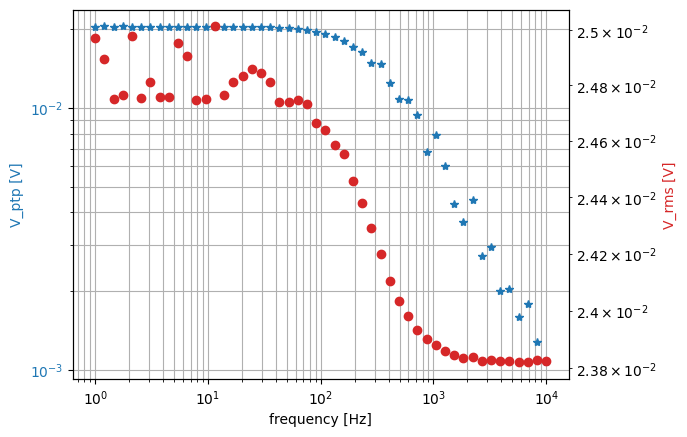

In [47]:
plot_frequency_sweep(name, dgw)

# With homemade LowPass
10Ohm, 20uF ~ 1kHz

In [48]:
name = 'low_pass_10Ohm_20uF'
measure_frequency_sweep(name, gw, dgw, 50)

100%|██████████| 50/50 [02:01<00:00,  2.43s/it]


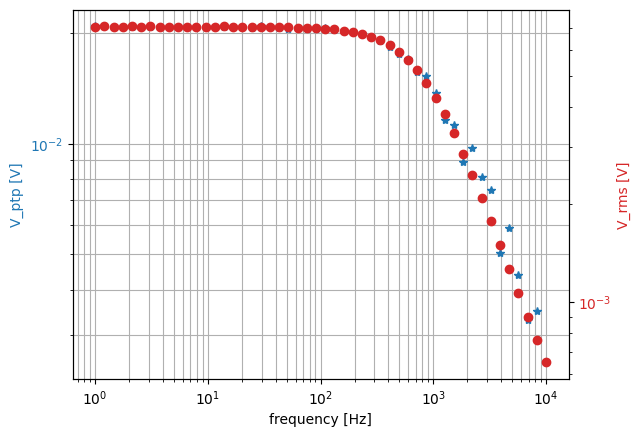

In [49]:
plot_frequency_sweep(name, dgw)

In [56]:
f_cut = 4e3
r = 1/(2*np.pi*2e-5*f_cut)
print(r)

1.9894367886486917


# With homemade LowPass 2
2Ohm, 20uF ~ 4kHz

In [57]:
name = 'low_pass_2Ohm_20uF'
measure_frequency_sweep(name, gw, dgw, 50)

100%|██████████| 50/50 [02:00<00:00,  2.42s/it]


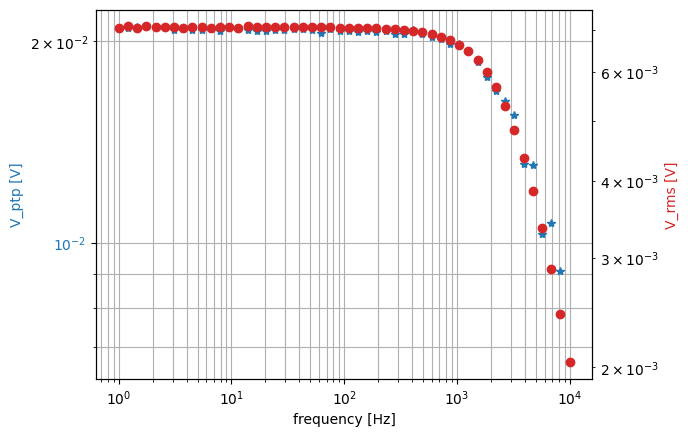

In [59]:
plot_frequency_sweep(name, dgw)

# With homemade LowPass 3
30Ohm, 20uF ~ 250 Hz

In [61]:
f_cut = 2.5e2
r = 1/(2*np.pi*2e-5*f_cut)
print(r)

31.830988618379067


In [62]:
name = 'low_pass_3Ohm_20uF'
measure_frequency_sweep(name, gw, dgw, 50)

100%|██████████| 50/50 [02:01<00:00,  2.43s/it]


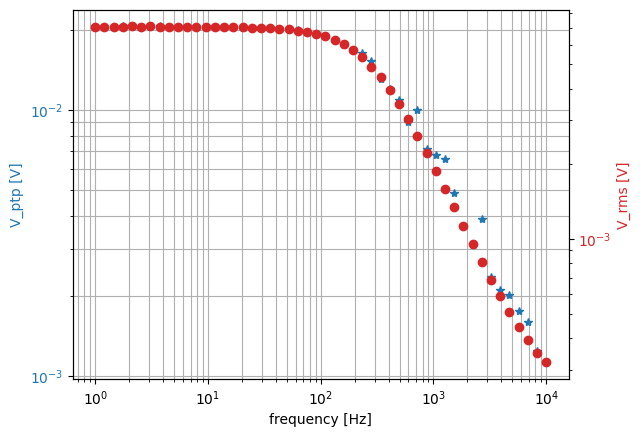

In [63]:
plot_frequency_sweep(name, dgw)